In [24]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras import  Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Loading Dataset:

It is dataset of Handwritten numbers so overall purpose of convolutional neural network will be to identify handwritten numbers.

In [2]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

In [3]:
x_train[0].shape

(28, 28)

### How data looks like:

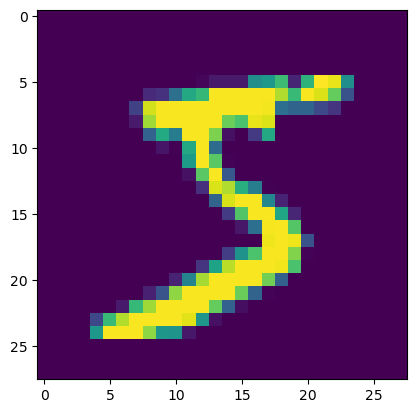

In [12]:
plt.imshow(x_train[0])

# CNN Model

In [13]:
model= Sequential()


#adding convolutional layer
model.add(Conv2D(   
    #number of filters----> total we will have 32 filter of each size 3x3
    5,
    #size of the filter
    kernel_size= (3,3),
    #now for no padding we will set padding to 'valid'
    padding= 'valid',
    activation= 'relu',
    input_shape= (28,28,1)))


#after convolutional layer adding MaxPooling layer
model.add(MaxPooling2D(
    #window size/filter size
    pool_size= (2,2),
    #stride
    strides=2,
    #we do not consider or do padding in max pooling layer so
    padding= 'valid'
))


model.add(Conv2D(5,
                kernel_size=(3,3),
                padding='valid',
                activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2),
                    strides=2,
                    padding='valid'))



model.add(Flatten())


#Fully Connected Layers
model.add(Dense(60,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 5)         50        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 5)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 5)         230       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 5)          0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 125)               0         
                                                                 
 dense_2 (Dense)             (None, 60)               

In [15]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
model.fit(x_train,
          y_train,
          epochs= 2)

Epoch 1/2
1875/1875 [==============================] - 48s 24ms/step - loss: 0.6904 - accuracy: 0.8307
Epoch 2/2
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1557 - accuracy: 0.9520


In [18]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 [==============================] - 4s 11ms/step - loss: 0.1296 - accuracy: 0.9596
0.9595999717712402


95% accuracy on test set.

# Predicting any example:

(28, 28)


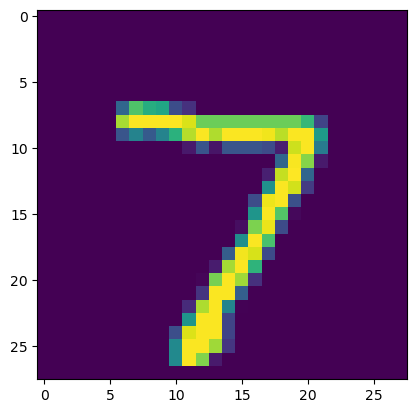

In [22]:
example= x_test[0]
print(example.shape)
plt.imshow(example)

In [28]:
example_reshaped = np.expand_dims(example, axis=0)

# Predict the class probabilities for the example
class_probabilities = model.predict(example_reshaped)

# Get the predicted class (index with highest probability)
predicted_class = np.argmax(class_probabilities)

1/1 [==============================] - 0s 101ms/step


In [31]:
class_probabilities

array([[1.42762175e-07, 1.00941244e-09, 1.03373604e-04, 2.08825372e-06,
        2.61772461e-11, 3.68861497e-10, 6.69788498e-13, 9.99893427e-01,
        9.37321715e-07, 1.07698490e-08]], dtype=float32)

9.99893427e-01 is highest probability, that represent the 7 class as we have classes 0 to 9.

In [33]:
print('predicted_class: ',predicted_class)

predicted_class:  7


# Prediction on real number Image: